In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data generated by a linear function



In [2]:
def generate_linear_regression_data(n=100, d=1, coef=[5], intercept=1, sigma=0):
  x = np.random.randn(n,d)
  y = (np.dot(x, coef) + intercept).squeeze() + sigma * np.random.randn(n)
  return x, y

## Gradient descent for simple linear regression


### Generate data

In [3]:
w_true = np.array([2, 3])
# y = 2 + 3x

In [4]:
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [3]


In [5]:
n_samples = 100

In [6]:
x, y = generate_linear_regression_data(n=n_samples, d=1, coef=coef, intercept=intercept)

In [7]:
x.shape

(100, 1)

In [8]:
y.shape

(100,)

In [9]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 2)

In [10]:
print(X[:5])

[[1.         0.34872832]
 [1.         0.88743569]
 [1.         0.39973129]
 [1.         0.40658197]
 [1.         0.02729681]]


### Define a descent step

In each gradient descent step, we will compute

\begin{aligned}
w_{k+1} &= w_k + \alpha_k X^T (y - X w_k) \\
&= w_k + \alpha_k \sum_{i=1}^n (y_k - \langle w_k,x_i \rangle) x_i.
\end{aligned} 

In [11]:
def gd_step(w, X, y, lr):
  # use current parameters to get y_hat
  y_hat = np.dot(X,w)
  # compute gradient for this y_hat
  grad = np.matmul(X.T, y_hat-y)
  # update weights
  w_new = w - lr*grad

  # we don't have to actually compute MSE
  # but I want to, for visualization 
  mse = 1.0/len(y)*np.sum(y_hat - y)**2

  return (w_new, mse, grad)


### Perform gradient descent

In [12]:
itr = 50
lr = 0.001
w_init = np.random.randn(len(w_true))
print(w_init)

[-0.1632627   0.03483762]


In [13]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

In [14]:
print(w_star)

[1.97679131 2.98694193]


### Visualize

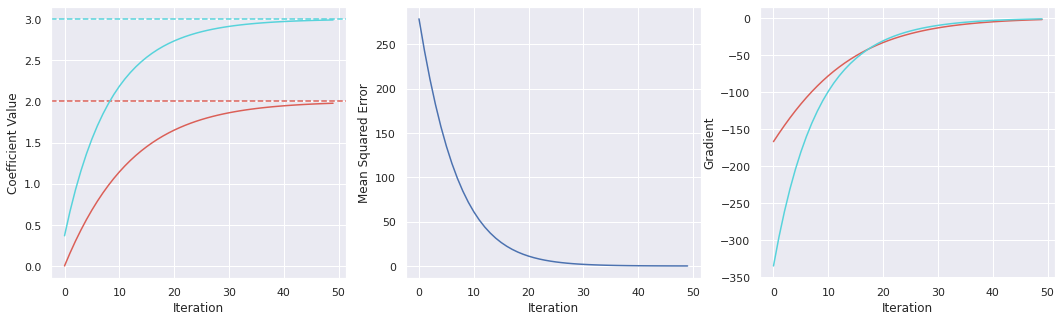

In [15]:
colors = sns.color_palette("hls", len(w_true))

plt.figure(figsize=(18,5))

plt.subplot(1,3,1);

for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");

plt.subplot(1,3, 2);
sns.lineplot(np.arange(itr), mse_steps);
#plt.yscale("log")
plt.xlabel("Iteration");
plt.ylabel("Mean Squared Error");


plt.subplot(1, 3, 3);
for n in range(len(coef)+1):
  sns.lineplot(np.arange(itr), grad_steps[:,n], color=colors[n]);
plt.xlabel("Iteration");
plt.ylabel("Gradient");


### Other things to try

* What happens if we increase the learning rate?
* What happens if we decrease the learning rate?

## Descent path

### Generate data

We will revisit our multiple linear regression.

In [16]:
w_true = [2, 6, 5]
intercept = w_true[0]
coef = w_true[1:]
print(intercept, coef)

2 [6, 5]


In [17]:
n_samples = 100

In [18]:
x, y = generate_linear_regression_data(n=n_samples, d=2, coef=coef, intercept=intercept)

### MSE contour

In [19]:
coefs = np.arange(2, 8, 0.05)
mses_coefs = np.zeros((len(coefs), len(coefs)))

for idx_1, c_1 in enumerate(coefs):
  for idx_2, c_2 in enumerate(coefs):
    y_coef = (intercept + np.dot(x,[c_1, c_2])).squeeze()
    mses_coefs[idx_1,idx_2] =  1.0/(len(y_coef)) * np.sum((y - y_coef)**2)

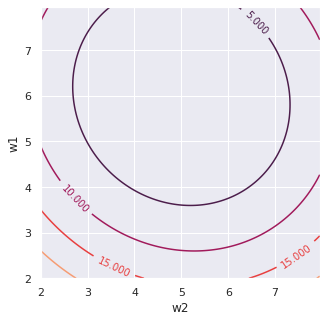

In [20]:
plt.figure(figsize=(5,5));
X1, X2 = np.meshgrid(coefs, coefs)
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');

### Perform gradient descent

In [21]:
X = np.hstack((np.ones((n_samples, 1)), x))
X.shape

(100, 3)

In [22]:
itr = 50
lr = 0.001
lr1 = 0.0002
lr2 = 0.002
lr3 = 0.02
w_init = [intercept, 2, 8]

In [23]:
w_steps = np.zeros((itr, len(w_init)))
mse_steps = np.zeros(itr)
grad_steps = np.zeros((itr, len(w_init)))

w_steps1 = np.zeros((itr, len(w_init)))
mse_steps1 = np.zeros(itr)
grad_steps1 = np.zeros((itr, len(w_init)))

w_steps2 = np.zeros((itr, len(w_init)))
mse_steps2 = np.zeros(itr)
grad_steps2 = np.zeros((itr, len(w_init)))

w_steps3 = np.zeros((itr, len(w_init)))
mse_steps3 = np.zeros(itr)
grad_steps3 = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star, mse, gradient = gd_step(w_star, X, y, lr)
  w_steps[i] = w_star
  mse_steps[i] = mse
  grad_steps[i] = gradient

w_star1 = w_init
for j in range(itr):
  w_star1, mse, gradient = gd_step(w_star1, X, y, lr1)
  w_steps1[j] = w_star1
  mse_steps1[j] = mse
  grad_steps1[j] = gradient

w_star2 = w_init
for k in range(itr):
  w_star2, mse, gradient = gd_step(w_star2, X, y, lr2)
  w_steps2[k] = w_star2
  mse_steps2[k] = mse
  grad_steps2[k] = gradient

w_star3 = w_init
for l in range(itr):
  w_star3, mse, gradient = gd_step(w_star3, X, y, lr3)
  w_steps3[l] = w_star3
  mse_steps3[l] = mse
  grad_steps3[l] = gradient

### Visualize 


<Figure size 2880x2160 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'With Learning rate 0.001')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'With Learning rate 0.0002')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'With Learning rate 0.002')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'With Learning rate 0.02')

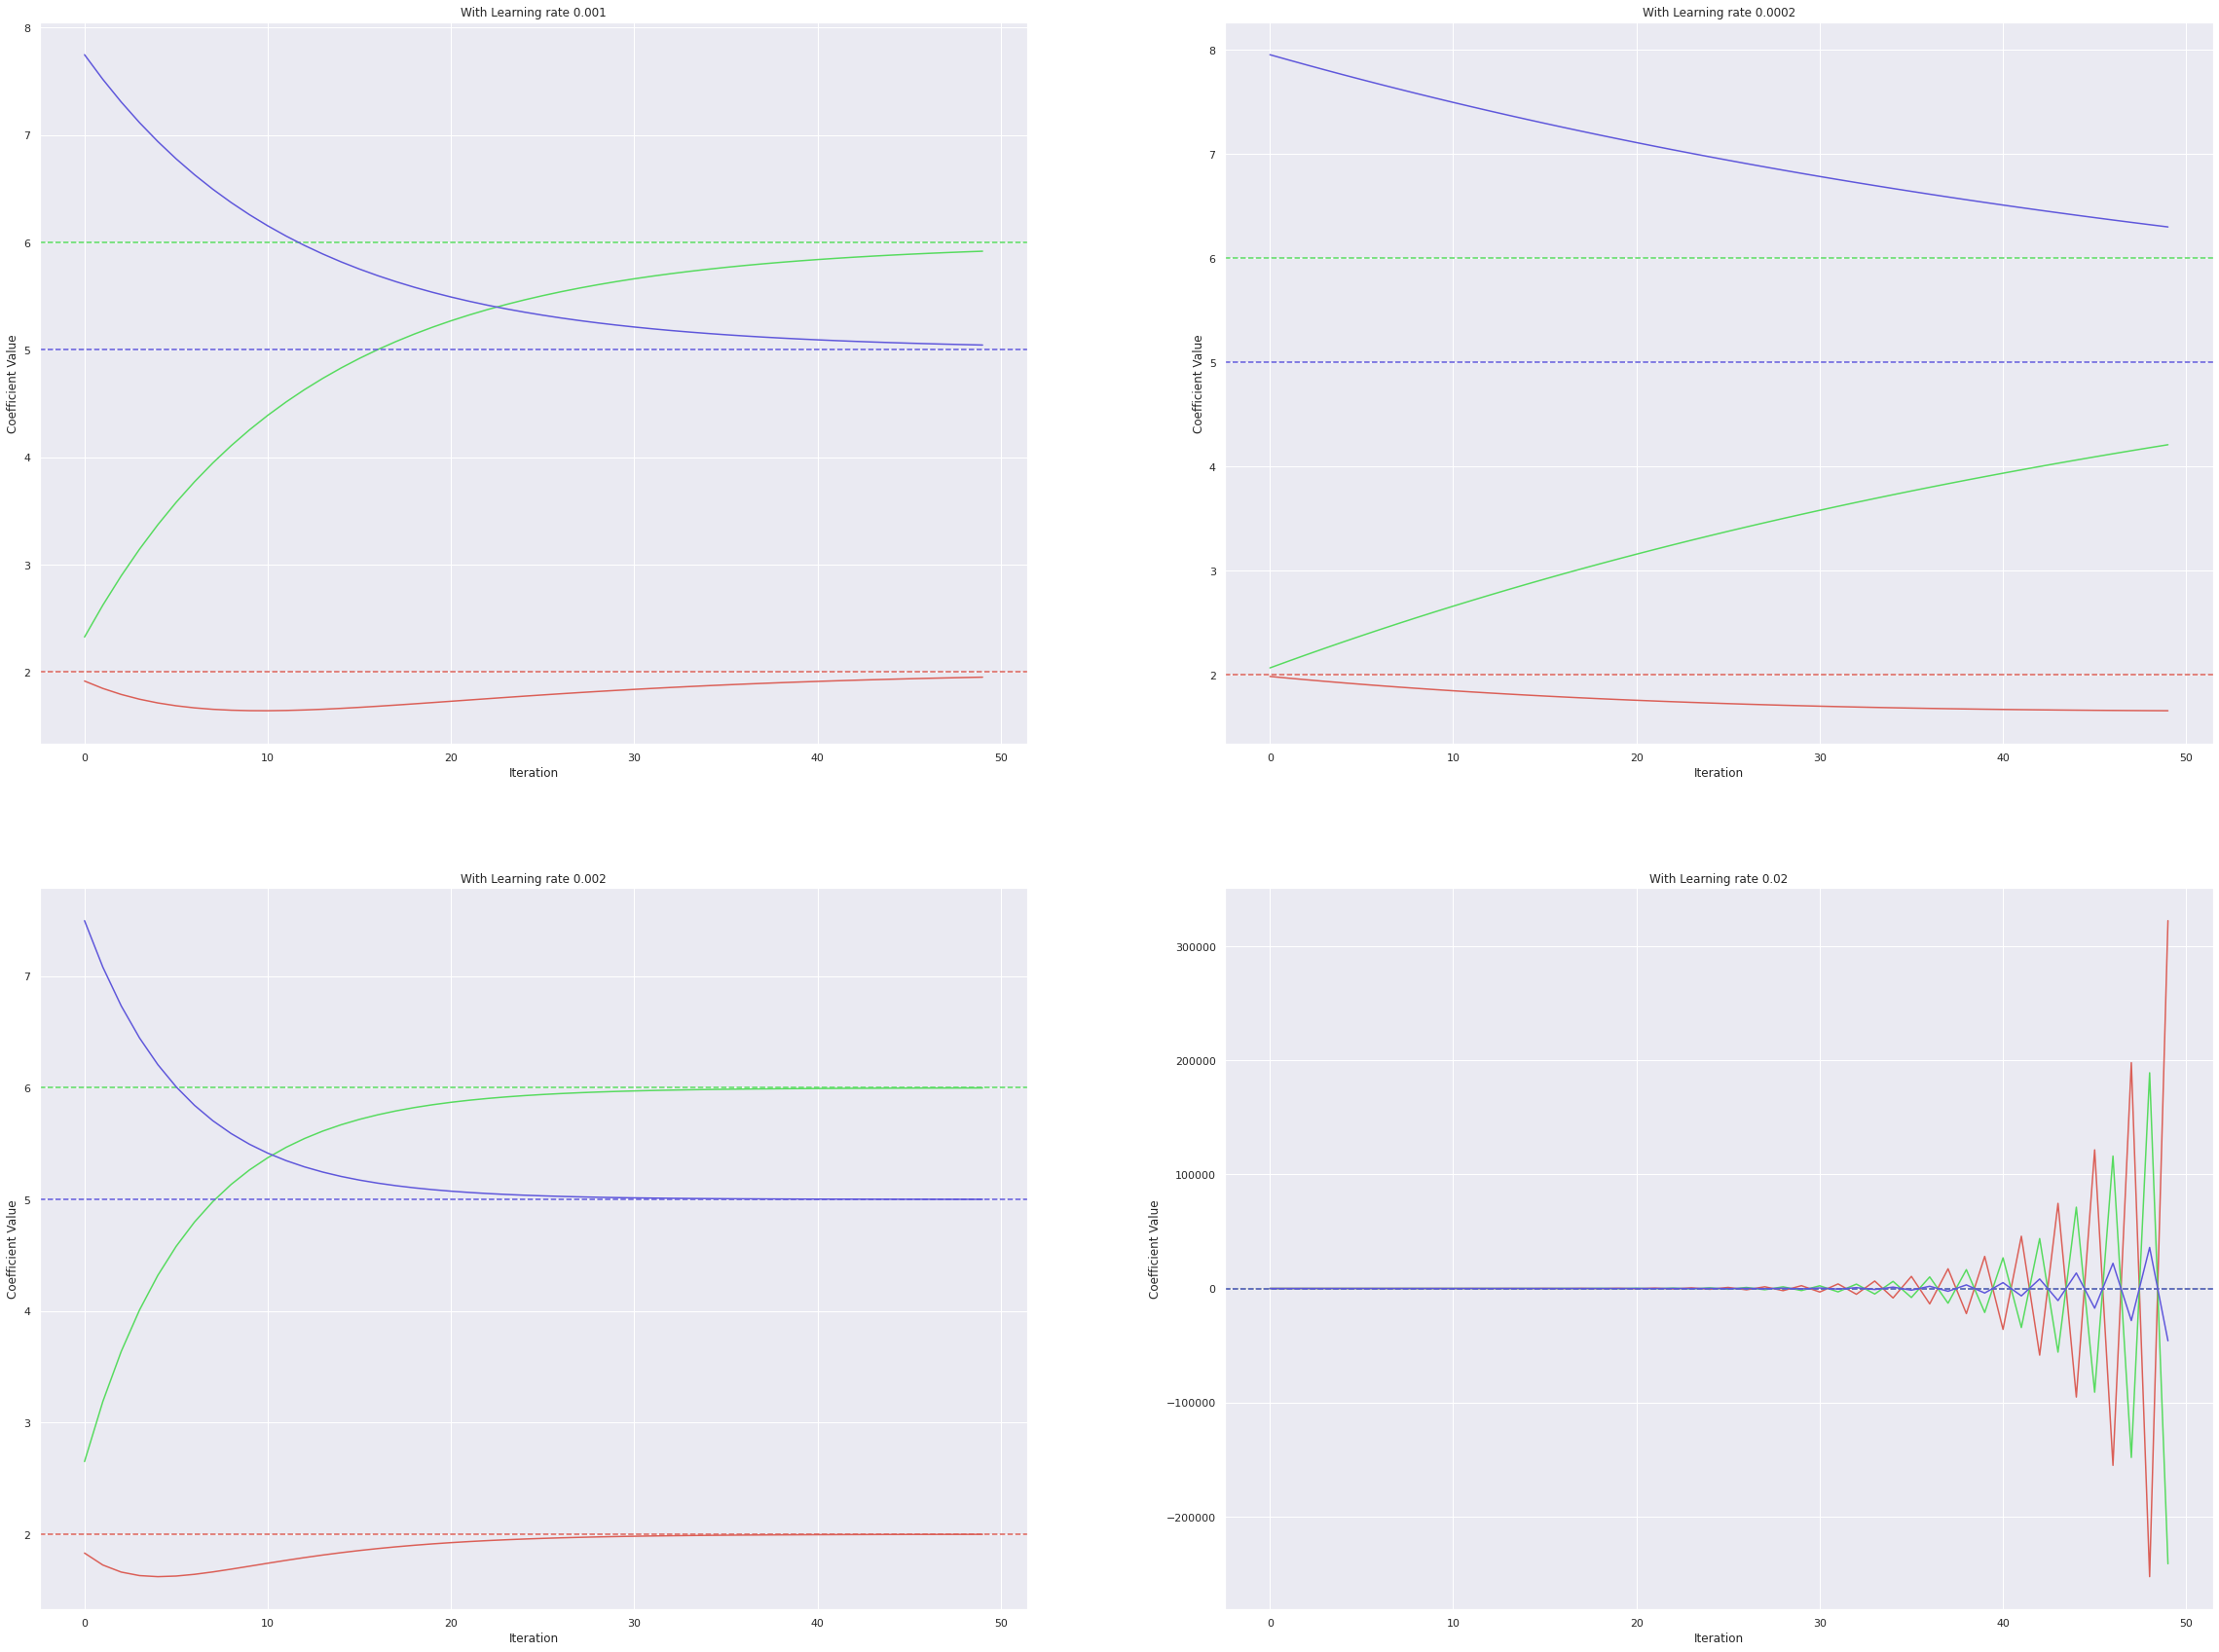

In [24]:
colors = sns.color_palette("hls", len(w_true))

plt.figure(figsize=(40,30))

plt.subplot(2,2,1);
for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("With Learning rate 0.001")

plt.subplot(2,2,2);
for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps1[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("With Learning rate 0.0002")

plt.subplot(2,2,3);
for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps2[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("With Learning rate 0.002")

plt.subplot(2,2,4);
for n in range(len(w_true)):
  plt.axhline(y=w_true[n], linestyle='--', color=colors[n]);
  sns.lineplot(np.arange(itr), w_steps3[:,n], color=colors[n]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("With Learning rate 0.02")

<Figure size 2880x2880 with 0 Axes>

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'With Learning rate 0.001')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'With Learning rate 0.0002')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'With Learning rate 0.002')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'With Learning rate 0.02')

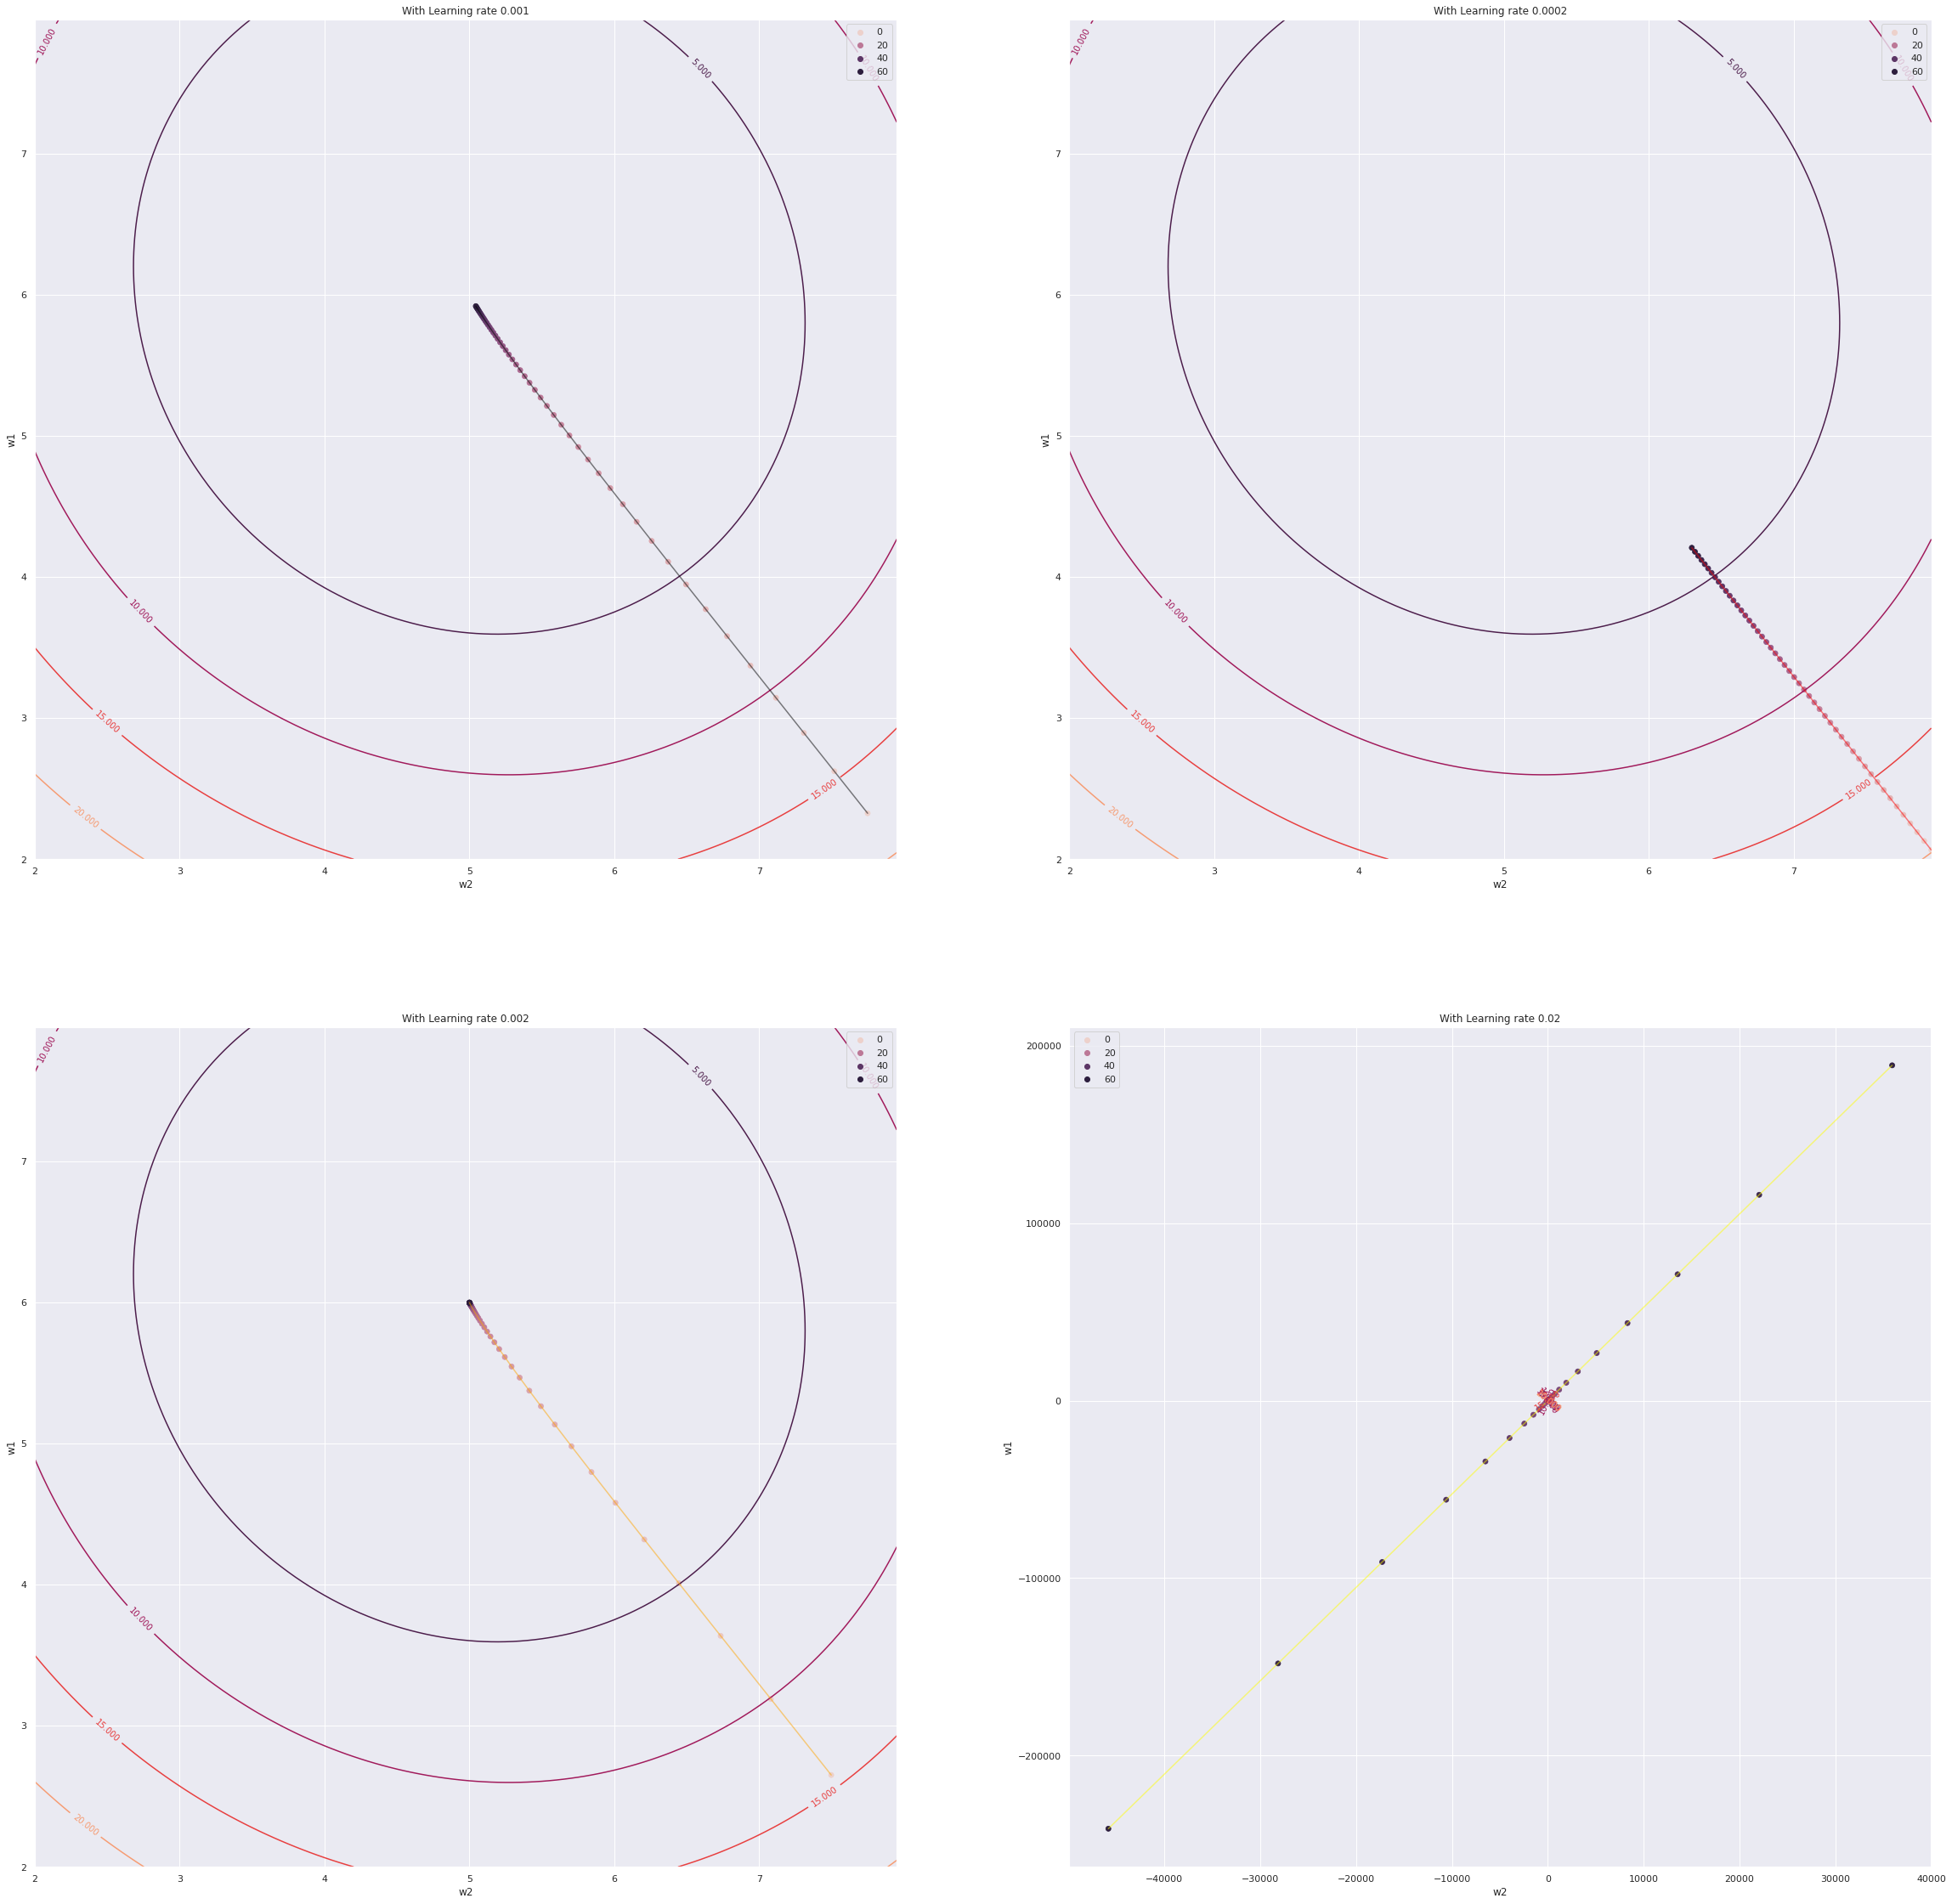

In [25]:
plt.figure(figsize=(40,40));

plt.subplot(2,2,1)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("With Learning rate 0.001")

plt.subplot(2,2,2)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps1[:,2], w_steps1[:,1], color='red', alpha=0.5);
sns.scatterplot(w_steps1[:,2], w_steps1[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("With Learning rate 0.0002")

plt.subplot(2,2,3)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps2[:,2], w_steps2[:,1], color='orange', alpha=0.5);
sns.scatterplot(w_steps2[:,2], w_steps2[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("With Learning rate 0.002")

plt.subplot(2,2,4)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps3[:,2], w_steps3[:,1], color='yellow', alpha=0.5);
sns.scatterplot(w_steps3[:,2], w_steps3[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("With Learning rate 0.02")

In [26]:
print("Estimated w value with learning rate 0.001:",w_star)
print("Estimated w value with learning rate 0.0002:",w_star1)
print("Estimated w value with learning rate 0.002:",w_star2)
print("Estimated w value with learning rate 0.02:",w_star3)

Estimated w value with learning rate 0.001: [1.95171879 5.91877305 5.04504859]
Estimated w value with learning rate 0.0002: [1.65415392 4.2068346  6.29688328]
Estimated w value with learning rate 0.002: [1.99895745 5.99846994 5.000677  ]
Estimated w value with learning rate 0.02: [ 322333.51557227 -241243.59414468  -45851.03379772]


### Other things to try

* What happens if we generate noisy data?

## Stochastic gradient descent

### Define a descent step

In [27]:
def sgd_step(w, X, y, lr, n):

  idx_sample = np.random.choice(X.shape[0], n, replace=True)

  X_sample = X[idx_sample, :]
  y_sample = y[idx_sample]

  # use current parameters to get y_hat
  y_hat = np.dot(X_sample,w)
  # compute gradient for this y_hat
  grad = np.matmul(X_sample.T, y_hat-y_sample)
  # update weights
  w_new = w - lr*grad

  return w_new


### Perform gradient descent

In [34]:
itr = 50
lr = 0.001
lr1 = 0.1
lr2 = 0.01
n = 1
n1 = 10
n2 = 100
w_init = [intercept, 2, 8]

In [35]:
w_steps = np.zeros((itr, len(w_init)))
w_steps1 = np.zeros((itr, len(w_init)))
w_steps2 = np.zeros((itr, len(w_init)))
w_steps3 = np.zeros((itr, len(w_init)))

w_star = w_init
for i in range(itr):
  w_star = sgd_step(w_star, X, y, lr, n)
  w_steps[i] = w_star

w_star1 = w_init
for j in range(itr):
  w_star1 = sgd_step(w_star1, X, y, lr1, n)
  w_steps1[j] = w_star1

w_star2 = w_init
for k in range(itr):
  w_star2 = sgd_step(w_star2, X, y, lr2, n1)
  w_steps2[k] = w_star2

w_star3 = w_init
for l in range(itr):
  w_star3 = sgd_step(w_star3, X, y, lr, n2)
  w_steps3[l] = w_star3


In [36]:
print("Estimated w value with learning rate 0.001 and n 1",w_star)
print("Estimated w value with learning rate 0.1 and n 1:",w_star1)
print("Estimated w value with learning rate 0.01 and n 10:",w_star2)
print("Estimated w value with learning rate 0.001 and n 100:",w_star3)

Estimated w value with learning rate 0.001 and n 1 [1.92479851 2.15056891 7.90473458]
Estimated w value with learning rate 0.1 and n 1: [1.98746655 5.89273006 4.97833867]
Estimated w value with learning rate 0.01 and n 10: [1.92495472 5.88934679 5.08499709]
Estimated w value with learning rate 0.001 and n 100: [1.9508376  5.9213986  5.04451497]


### Visualize 


<Figure size 2880x2160 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'learning rate 0.001 and n 1')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'learning rate 0.1 and n 1')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'learning rate 0.01 and n 10')

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Coefficient Value')

Text(0.5, 1.0, 'learning rate 0.001 and n 100')

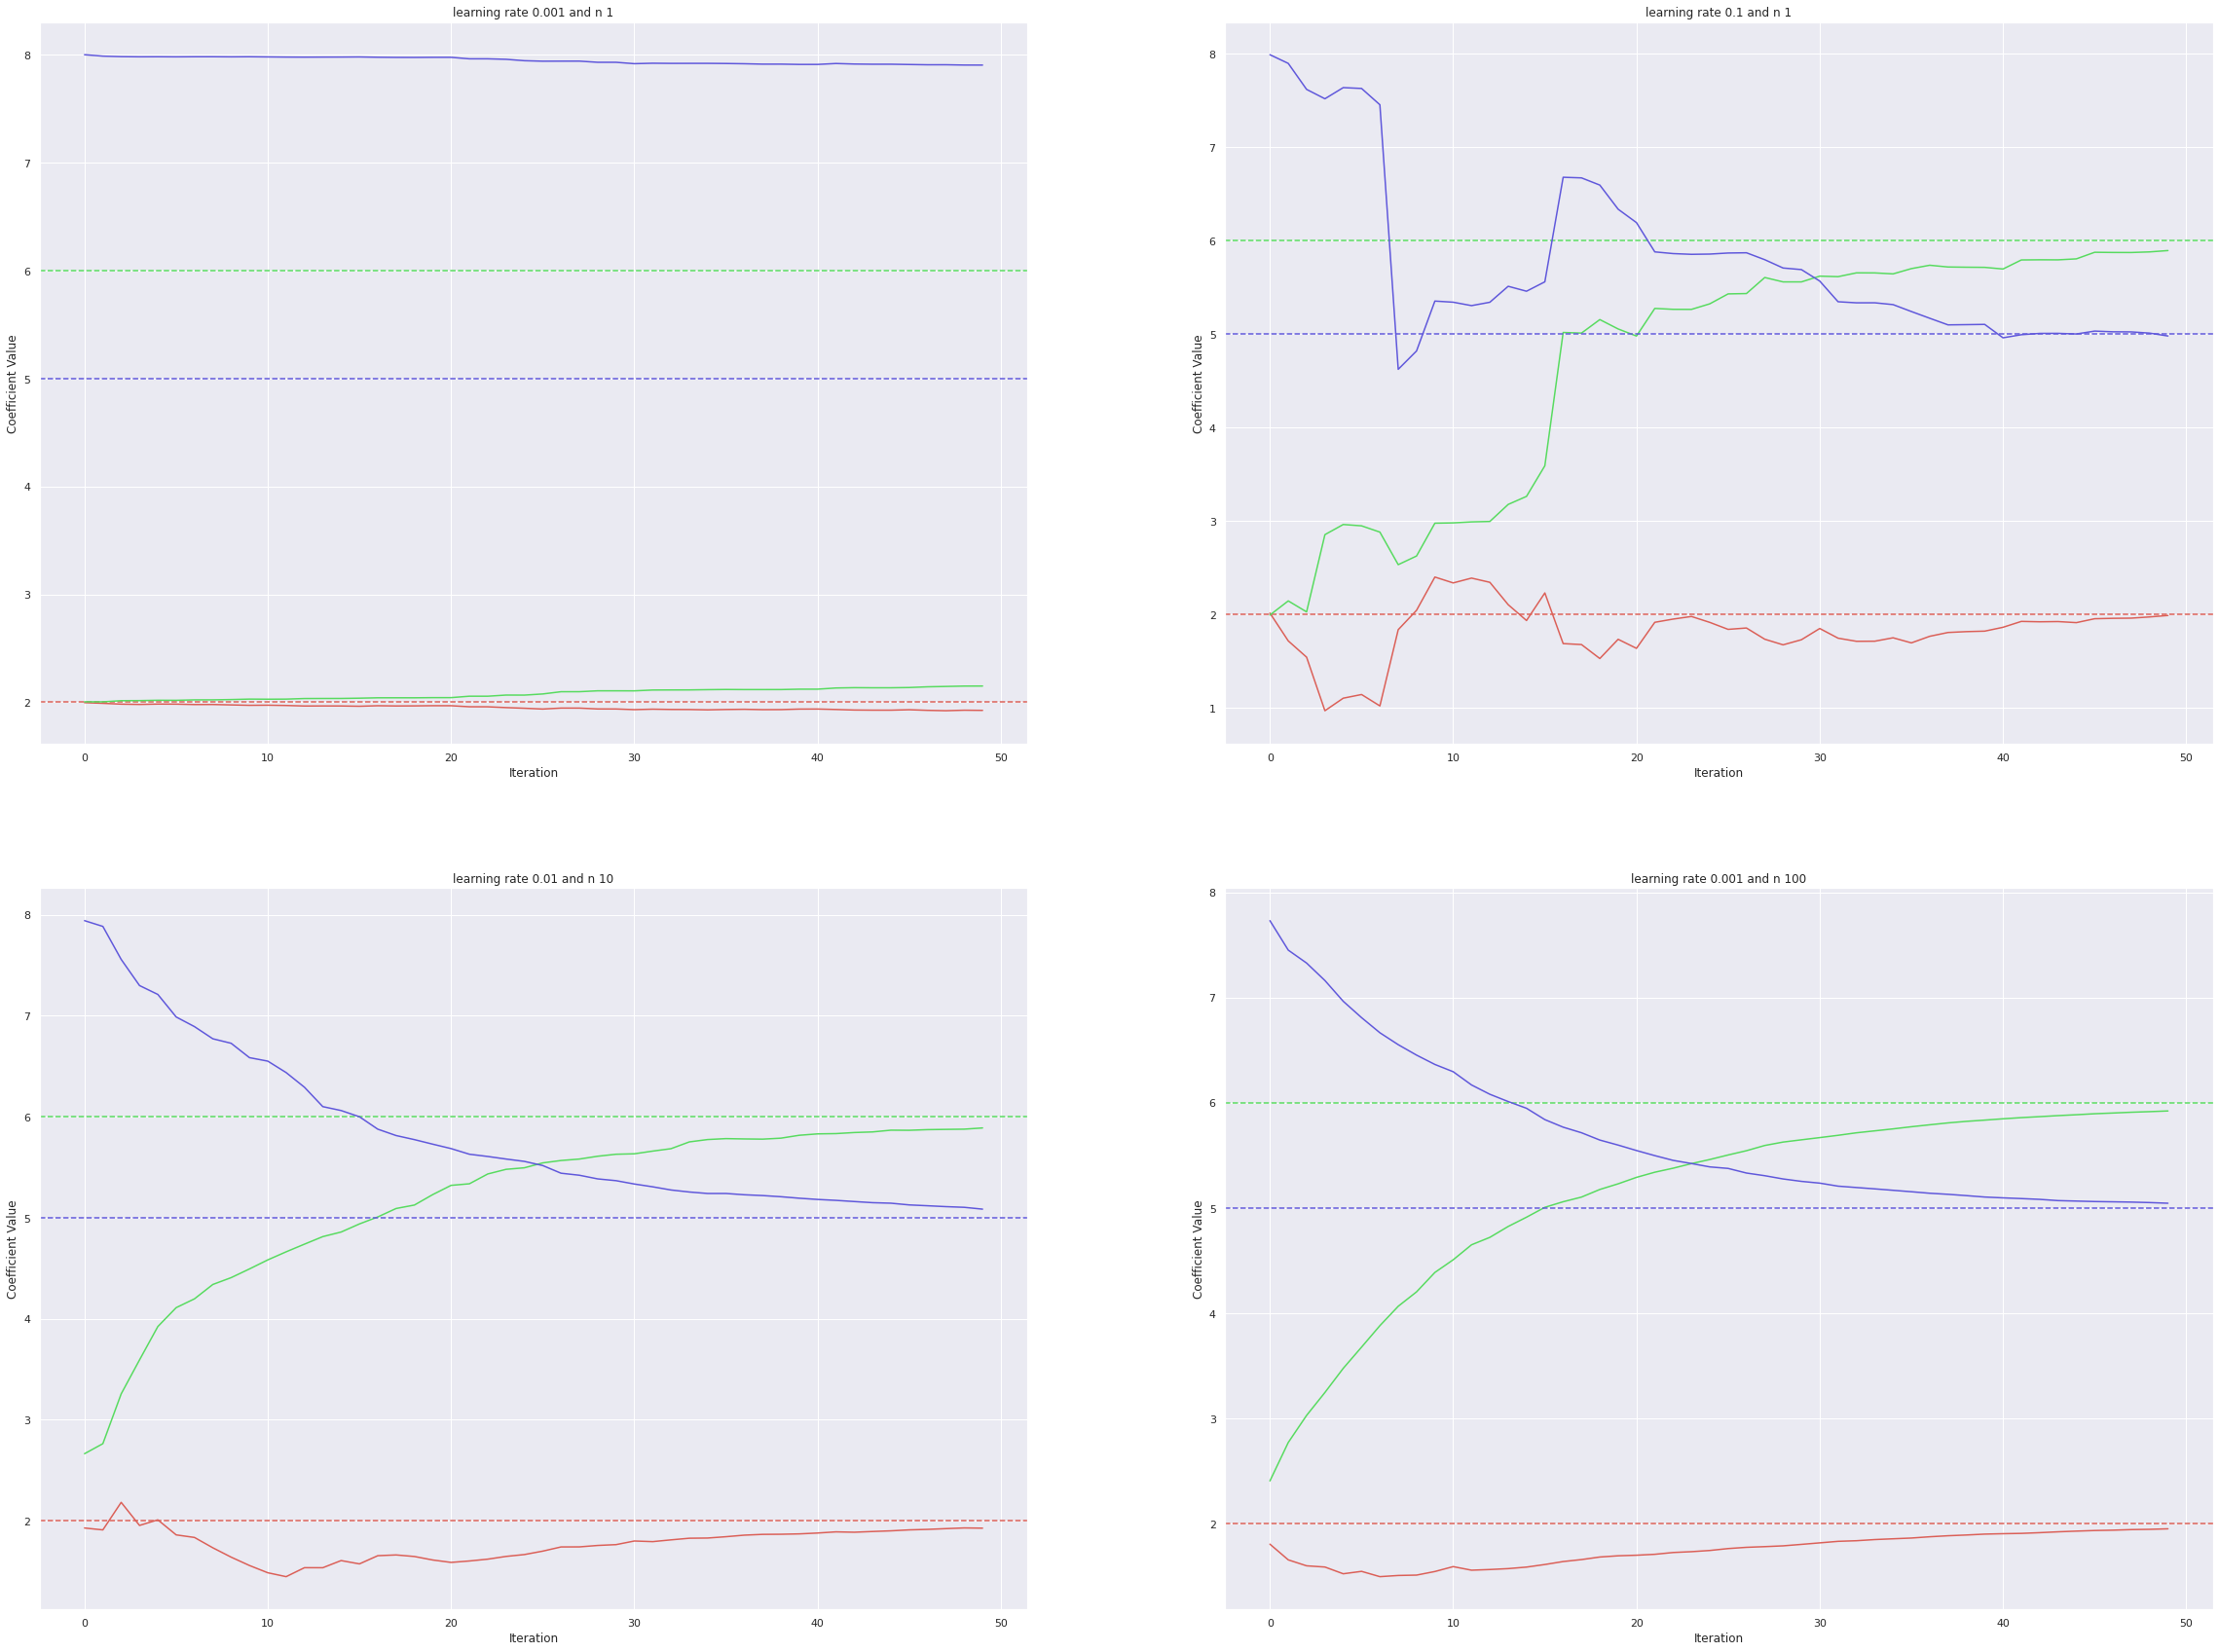

In [37]:
colors = sns.color_palette("hls", len(coef) + 1)

plt.figure(figsize=(40,30))

plt.subplot(2,2,1);
plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("learning rate 0.001 and n 1")

plt.subplot(2,2,2);
plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps1[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps1[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("learning rate 0.1 and n 1")

plt.subplot(2,2,3);
plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps2[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps2[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("learning rate 0.01 and n 10")

plt.subplot(2,2,4);
plt.axhline(y=intercept, linestyle='--', color=colors[0]);
sns.lineplot(np.arange(itr), w_steps3[:,0], color=colors[0]);

for n in range(len(coef)):
  plt.axhline(y=coef[n], linestyle='--', color=colors[n+1]);
  sns.lineplot(np.arange(itr), w_steps3[:,n+1], color=colors[n+1]);

plt.xlabel("Iteration");
plt.ylabel("Coefficient Value");
plt.title("learning rate 0.001 and n 100")


<Figure size 2880x2880 with 0 Axes>

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'learning rate 0.001 and n 1')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'learning rate 0.1 and n 1')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'learning rate 0.01 and n 10')

<a list of 7 text.Text objects>

Text(0.5, 0, 'w2')

Text(0, 0.5, 'w1')

Text(0.5, 1.0, 'learning rate 0.001 and n 100')

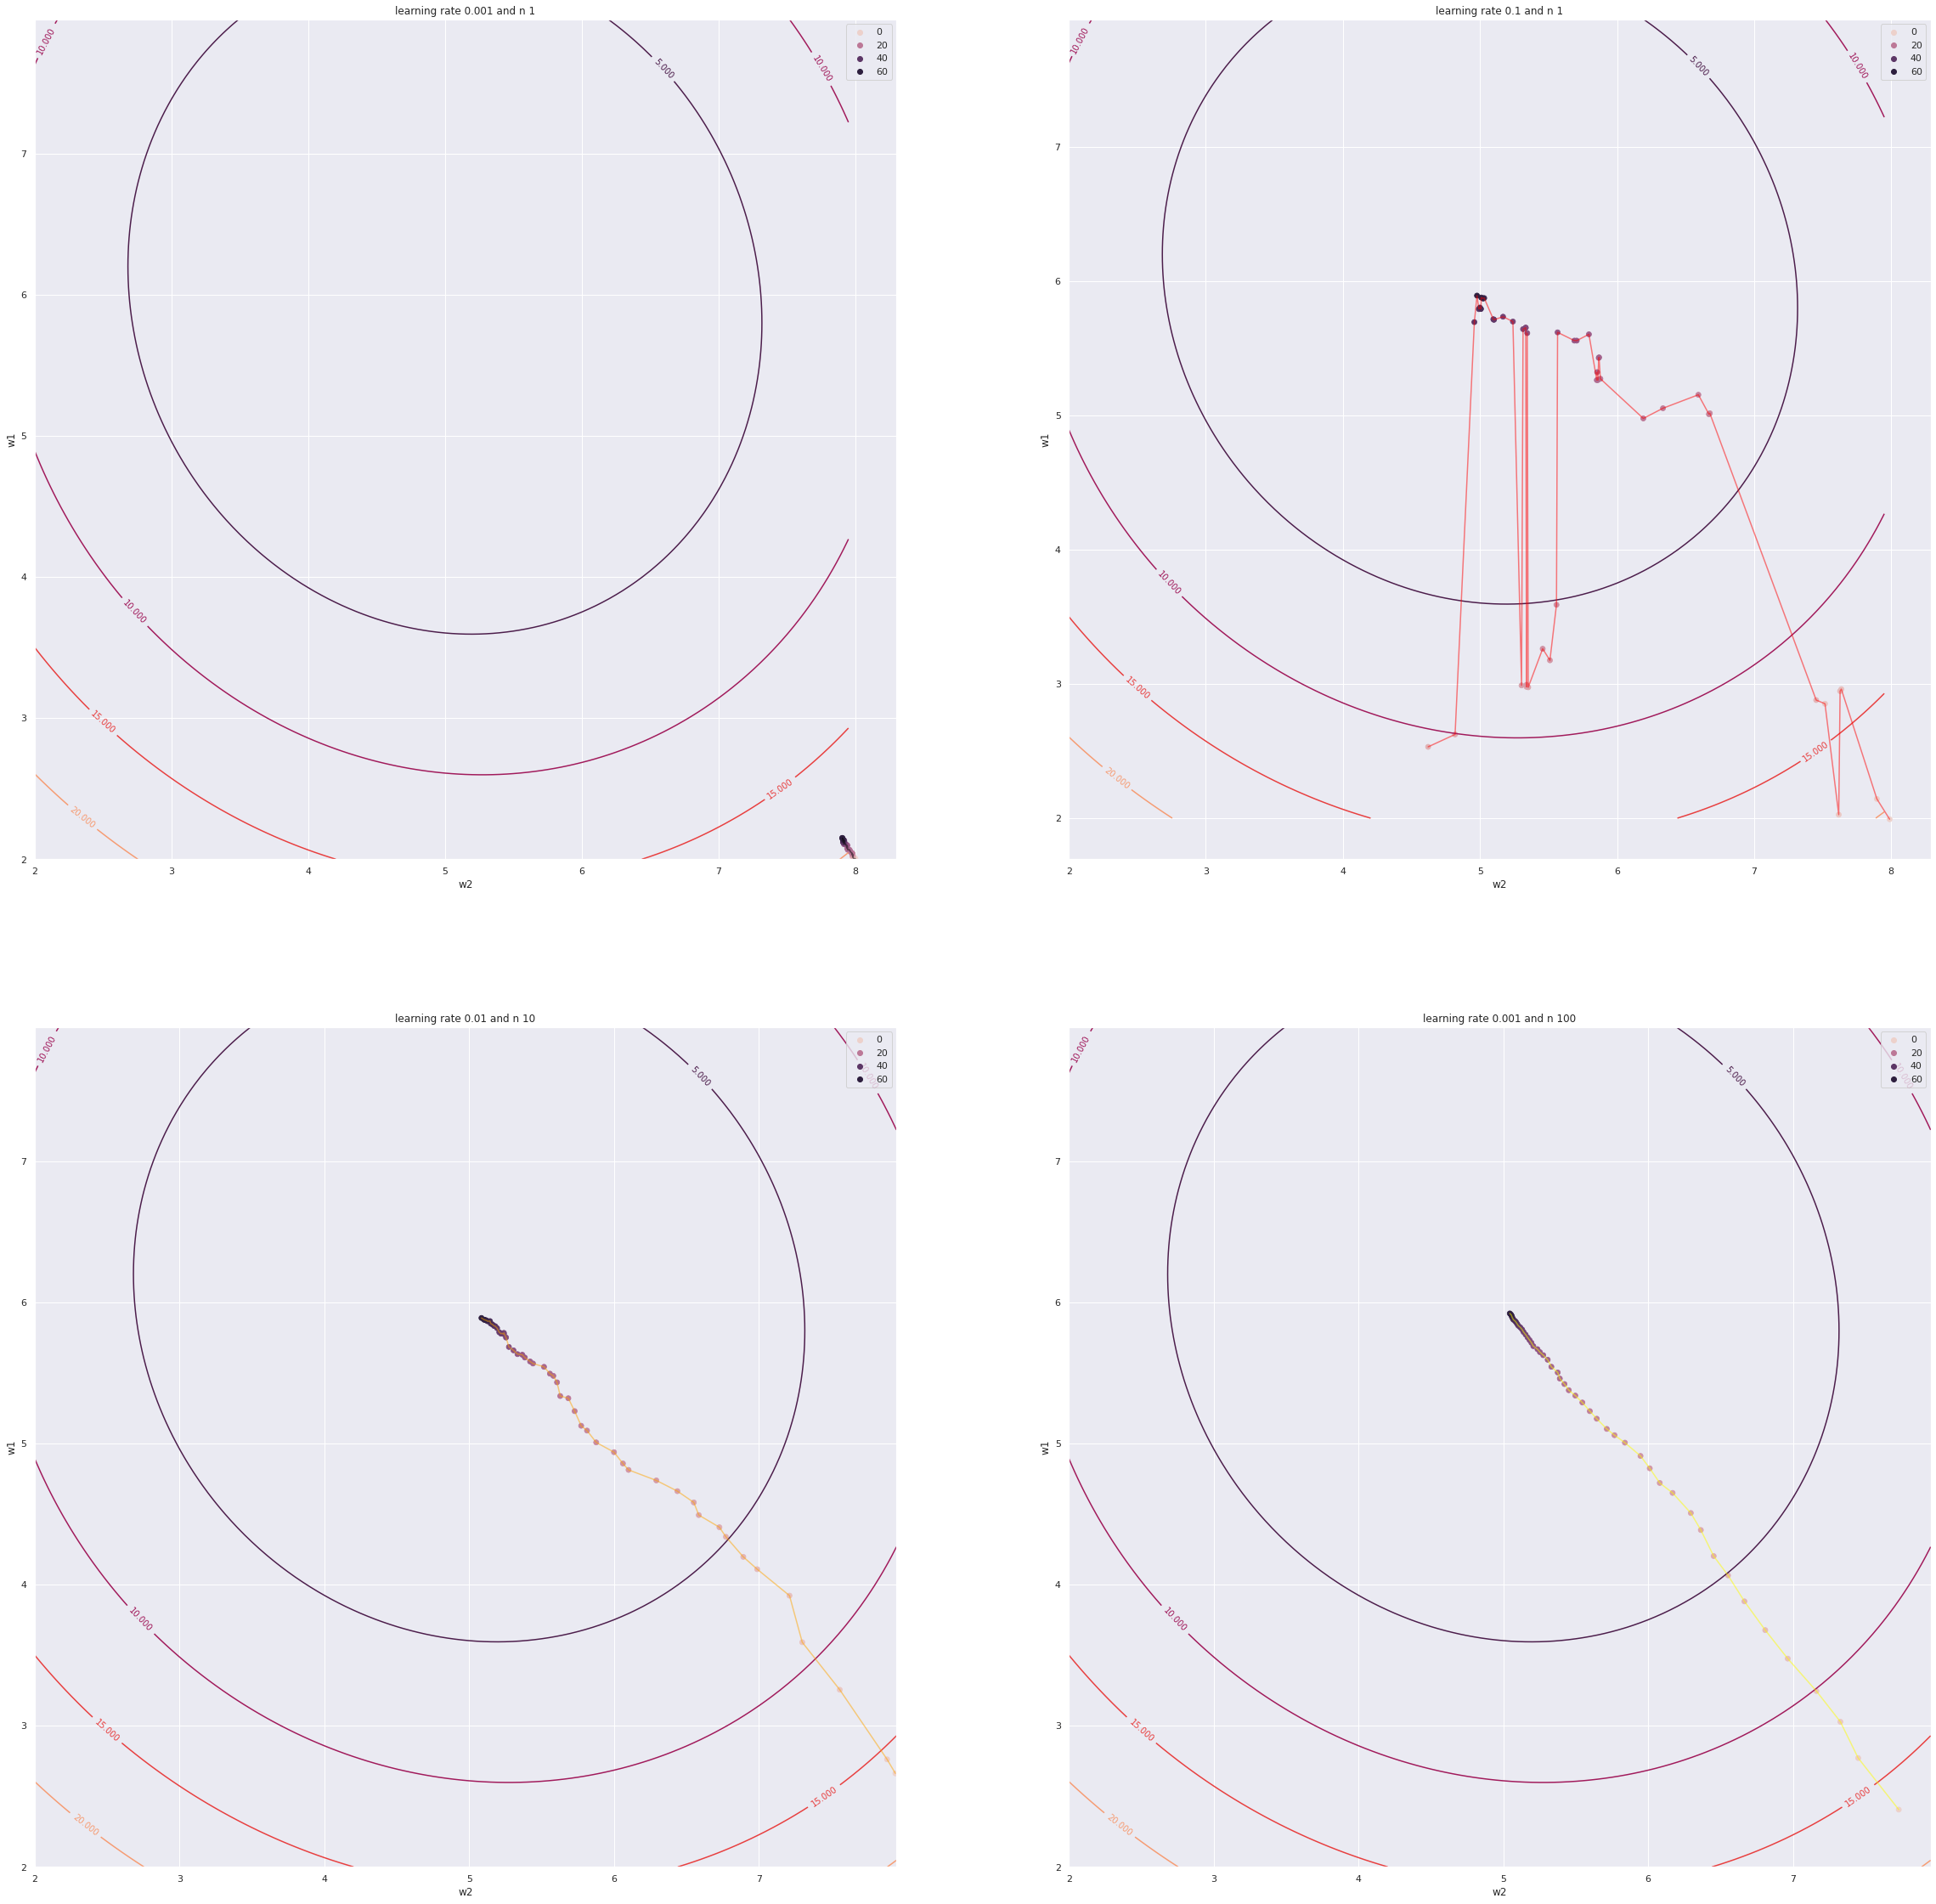

In [39]:
plt.figure(figsize=(40,40));

plt.subplot(2,2,1)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps[:,2], w_steps[:,1], color='black', alpha=0.5);
sns.scatterplot(w_steps[:,2], w_steps[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("learning rate 0.001 and n 1")

plt.subplot(2,2,2)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps1[:,2], w_steps1[:,1], color='red', alpha=0.5);
sns.scatterplot(w_steps1[:,2], w_steps1[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("learning rate 0.1 and n 1")

plt.subplot(2,2,3)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps2[:,2], w_steps2[:,1], color='orange', alpha=0.5);
sns.scatterplot(w_steps2[:,2], w_steps2[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("learning rate 0.01 and n 10")

plt.subplot(2,2,4)
X1, X2 = np.meshgrid(coefs, coefs);
p = plt.contour(X1, X2, mses_coefs, levels=5);
plt.clabel(p, inline=1, fontsize=10);
plt.xlabel('w2');
plt.ylabel('w1');
sns.lineplot(w_steps3[:,2], w_steps3[:,1], color='yellow', alpha=0.5);
sns.scatterplot(w_steps3[:,2], w_steps3[:,1], hue=np.arange(itr), edgecolor=None);
plt.title("learning rate 0.001 and n 100")


### Other things to try

* Increase learning rate?
* Decrease learning rate?
* Use decaying learning rate $\alpha_k = C/k $?
* Increase number of samples used in each iteration?
